# 初期設定

In [35]:
import math
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
%pylab inline --no-import-all
#%matplotlib

plt.style.use('ggplot')
font = {'family' : 'meiryo'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [100]:
#よく使うもの
han=['1han','2han','3han','4han']
chamber=['1','2','3','4']
cchamber=['c1','c2','c3','c4']
col=['r','g','b','m']
zikken=['a','b','c','d']
noudo=['1/128','1/64','1/32','1/16','1/8','1/4','1/2','1'][::-1]
'''def tyusyutsu(h,z):#(han,zikken)
    return [csv.ix[h,k].ix\
       [(csv.ix[h,k].time_min>=\
         float(time.ix[(time.han==h)&(time.実験==z)&(time.noudo=='1')&(time.chamber==k),'time'])+4.0)\
        &(csv.ix[h,k].time_min<=\
          float(time.ix[(time.han==h)&(time.実験==z)&(time.noudo=='1')&(time.chamber==k),'time'])+6.0)\
        ,:] for k in cchamber ]'''
def pickup(h,z,n):#(han,zikken,noudo)
    return [csv.ix[h,k].ix\
       [(csv.ix[h,k].time_min>=\
         float(time.ix[(time.han==h)&(time.実験==z)&(time.noudo==n)&(time.chamber==k),'time'])+4.0)\
        &(csv.ix[h,k].time_min<=\
          float(time.ix[(time.han==h)&(time.実験==z)&(time.noudo==n)&(time.chamber==k),'time'])+5.0)\
        ,:] for k in cchamber ]
'''def plot_function_name(name, x=0, y=0):
    plt.text(x, y, name, alpha=1, size=25, ha="center", va="center")'''

'def plot_function_name(name, x=0, y=0):\n    plt.text(x, y, name, alpha=1, size=25, ha="center", va="center")'

# データ読み込み

In [3]:
csv=pd.DataFrame([[pd.read_csv('Stats/'+str(i)+str(j)+'.csv') for j in chamber] for i in han],\
                 index=han,columns=cchamber)
for j in cchamber:
    for i in han:
        csv.ix[i,j]['chamber']=j
        csv.ix[i,j]['han']=i
csv.ix['2han','c1']

,time_min,first_hz,amp,mean,median,sd,skewness,kurtosis,Unnamed: 8,Unnamed: 9,chamber,han
0,0.1,7,4.053922e+08,4.607633e+07,1.811971e+07,6.943144e+07,3.189301,14.982064,NaN,NaN,c1,2han
1,0.2,7,1.977344e+08,4.188050e+07,1.906095e+07,4.894173e+07,1.422475,4.129003,NaN,NaN,c1,2han
2,0.3,61,2.086940e+08,3.681694e+07,1.463004e+07,4.926609e+07,1.690014,5.072133,NaN,NaN,c1,2han
3,0.4,68,1.294751e+08,2.895721e+07,1.555443e+07,2.985363e+07,1.375830,4.316929,NaN,NaN,c1,2han
4,0.5,30,1.355016e+08,2.190440e+07,1.087713e+07,2.803299e+07,2.150414,7.419030,NaN,NaN,c1,2han
5,0.6,41,2.086392e+08,1.759390e+07,7.188299e+06,2.944342e+07,4.061179,24.425870,NaN,NaN,c1,2han
6,0.7,52,1.959823e+08,3.642425e+07,2.182851e+07,3.829186e+07,2.021168,7.609215,NaN,NaN,c1,2han
7,0.8,40,2.048773e+08,1.641006e+07,4.469516e+06,3.351661e+07,3.760821,18.932242,NaN,NaN,c1,2han
8,0.9,41,2.272844e+08,1.905992e+07,7.863053e+06,3.900133e+07,4.064967,19.680202,NaN,NaN,c1,2han
9,1.0,27,2.441879e+08,2.633356e+07,1.119677e+07,4.366264e+07,3.061856,13.218060,NaN,NaN,c1,2han


In [4]:
time=pd.read_csv('time.csv',dtype={'han':str,'chamber':str})
time['time']=[float(list(x)[0])*60+float(list(x)[2]+list(x)[3]) for x in time['time']]
time['han']=[str(x)+'han' for x in time['han']]
time['chamber']=['c'+x for x in time['chamber']]

# プロット
各chamberを1:赤，2:緑，3:青，4:紫としています。

４行のときは各班のデータです。（1行目:1班）

## 全データ
（縦:班，横:chamber）

### first_hzとamp
amp=10^6あたりで横に線ができるのは，振幅が低い時にfirst_hzが揺らぐためか？

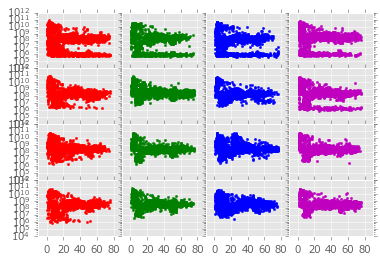

In [61]:
fig,axes=plt.subplots(4,4,sharex=True, sharey=True)
plt.yscale('log')
fig
for i in range(4):
    for j in range(4):
        axes[i,j].set_ylim([10e3,10e11])
        axes[i,j].scatter(csv.ix[han[i],cchamber[j]].first_hz,csv.ix[han[i],cchamber[j]].amp, marker='.',color=col[j])
plt.subplots_adjust(wspace=0, hspace=0)

### first_hzとmean
上のグラフと比較して頭打ち感がある。

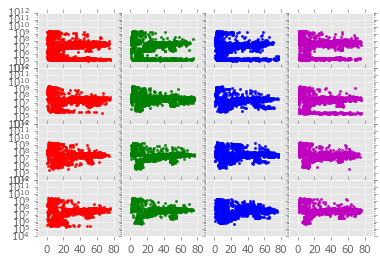

In [99]:
fig,axes=plt.subplots(4,4,sharex=True, sharey=True)
plt.yscale('log')
fig
for i in range(4):
    for j in range(4):
        axes[i,j].set_ylim([10e3,10e11])
        axes[i,j].scatter(csv.ix[han[i],cchamber[j]].first_hz,csv.ix[han[i],cchamber[j]]['mean'], marker='.',color=col[j])
plt.subplots_adjust(wspace=0, hspace=0)

### meanとamp

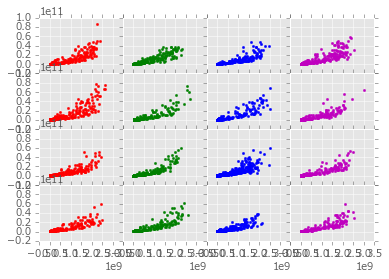

In [63]:
fig,axes=plt.subplots(4,4,sharex=True, sharey=True)
#plt.yscale('log')
fig
for i in range(4):
    for j in range(4):
        #axes[i,j].set_ylim([10e3,10e11])
        axes[i,j].scatter(csv.ix[han[i],cchamber[j]]['mean'],csv.ix[han[i],cchamber[j]].amp, marker='.',color=col[j])
plt.subplots_adjust(wspace=0, hspace=0)

### ampとsd
直線状

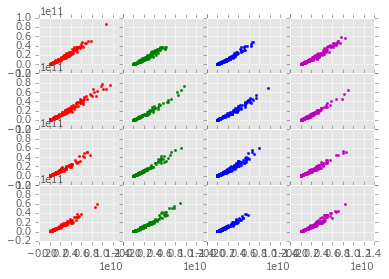

In [64]:
fig,axes=plt.subplots(4,4,sharex=True, sharey=True)
#plt.yscale('log')
fig
for i in range(4):
    for j in range(4):
        #axes[i,j].set_ylim([10e3,10e11])
        axes[i,j].scatter(csv.ix[han[i],cchamber[j]]['sd'],csv.ix[han[i],cchamber[j]].amp, marker='.',color=col[j])
plt.subplots_adjust(wspace=0, hspace=0)

### sdとmean

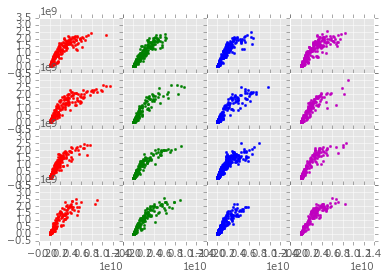

In [65]:
fig,axes=plt.subplots(4,4,sharex=True, sharey=True)
#plt.yscale('log')
fig
for i in range(4):
    for j in range(4):
        #axes[i,j].set_ylim([10e3,10e11])
        axes[i,j].scatter(csv.ix[han[i],cchamber[j]]['sd'],csv.ix[han[i],cchamber[j]]['mean'], marker='.',color=col[j])
plt.subplots_adjust(wspace=0, hspace=0)

### meanとmedian

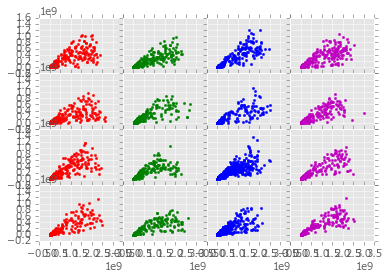

In [66]:
fig,axes=plt.subplots(4,4,sharex=True, sharey=True)
#plt.yscale('log')
fig
for i in range(4):
    for j in range(4):
        #axes[i,j].set_ylim([10e3,10e11])
        axes[i,j].scatter(csv.ix[han[i],cchamber[j]]['mean'],csv.ix[han[i],cchamber[j]]['median'], marker='.',color=col[j])
plt.subplots_adjust(wspace=0, hspace=0)

### ampとmedian

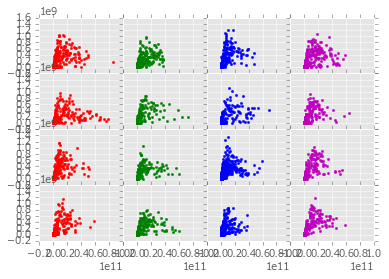

In [67]:
fig,axes=plt.subplots(4,4,sharex=True, sharey=True)
#plt.yscale('log')
fig
for i in range(4):
    for j in range(4):
        #axes[i,j].set_ylim([10e3,10e11])
        axes[i,j].scatter(csv.ix[han[i],cchamber[j]]['amp'],csv.ix[han[i],cchamber[j]]['median'], marker='.',color=col[j])
plt.subplots_adjust(wspace=0, hspace=0)

### meanとskewness

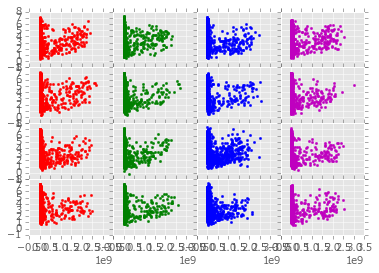

In [68]:
fig,axes=plt.subplots(4,4,sharex=True, sharey=True)
#plt.yscale('log')
fig
for i in range(4):
    for j in range(4):
        #axes[i,j].set_ylim([10e3,10e11])
        axes[i,j].scatter(csv.ix[han[i],cchamber[j]]['mean'],csv.ix[han[i],cchamber[j]]['skewness'], marker='.',color=col[j])
plt.subplots_adjust(wspace=0, hspace=0)

### meanとkurtosis

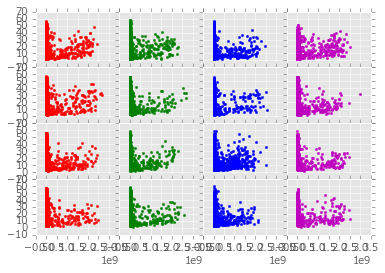

In [69]:
fig,axes=plt.subplots(4,4,sharex=True, sharey=True)
#plt.yscale('log')
fig
for i in range(4):
    for j in range(4):
        #axes[i,j].set_ylim([10e3,10e11])
        axes[i,j].scatter(csv.ix[han[i],cchamber[j]]['mean'],csv.ix[han[i],cchamber[j]]['kurtosis'], marker='.',color=col[j])
plt.subplots_adjust(wspace=0, hspace=0)

### skewnessとkurtosis
線形に並んだ。

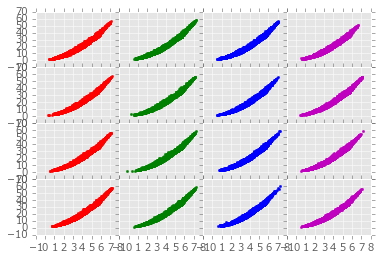

In [70]:
fig,axes=plt.subplots(4,4,sharex=True, sharey=True)
#plt.yscale('log')
fig
for i in range(4):
    for j in range(4):
        #axes[i,j].set_ylim([10e3,10e11])
        axes[i,j].scatter(csv.ix[han[i],cchamber[j]]['skewness'],csv.ix[han[i],cchamber[j]]['kurtosis'], marker='.',color=col[j])
plt.subplots_adjust(wspace=0, hspace=0)

### first_hzとskewness

Populating the interactive namespace from numpy and matplotlib


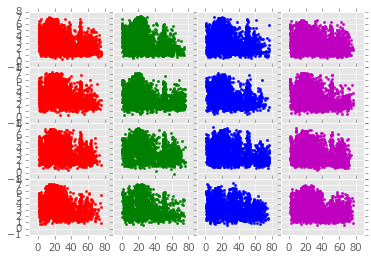

In [71]:
%pylab inline --no-import-all
fig,axes=plt.subplots(4,4,sharex=True, sharey=True)
#plt.yscale('log')
fig
for i in range(4):
    for j in range(4):
        #axes[i,j].set_ylim([10e3,10e11])
        axes[i,j].scatter(csv.ix[han[i],cchamber[j]]['first_hz'],csv.ix[han[i],cchamber[j]]['skewness'], marker='.',color=col[j])
plt.subplots_adjust(wspace=0, hspace=0)

### 結論
７つの変数のうち，（amp・sd）と（skewness・kurtosis）の組はそれぞれ相関があるので，大事なのは4つの変数に絞られる。

+ first_hz
+ mean（amp・sd）のどれか （※ampを採用）
+ median
+ （skewness・kurtosis）のどれか

### 三次元プロット
first_hzとlog(amp)とmedian(amp)は平面になった。

Populating the interactive namespace from numpy and matplotlib


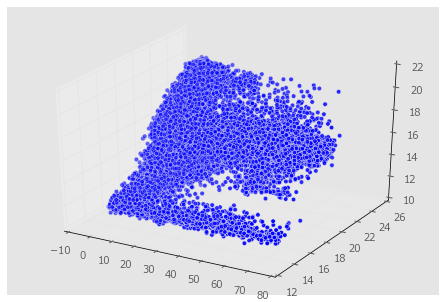

In [72]:
#%pylab inline --no-import-all
#%matplotlib
x=[pd.read_csv('Stats/'+str(i)+str(j)+'.csv') for j in chamber for i in han]
X=pd.concat(x)
X
#%matplotlib 
%pylab inline --no-import-all
fig = plt.figure()
ax = Axes3D(fig)
#plt.xscale('log')
ax.scatter3D(X['first_hz'],X['amp'].apply(lambda x :math.log(x)),X['median'].apply(lambda x :math.log(x)))
plt.show()

first_hzとlog(amp)とmedian(amp)は平面になった。

Available matplotlib backends: ['tk', 'qt4', 'wx', 'qt', 'qt5', 'inline', 'nbagg', 'gtk', 'notebook', 'gtk3', 'osx']


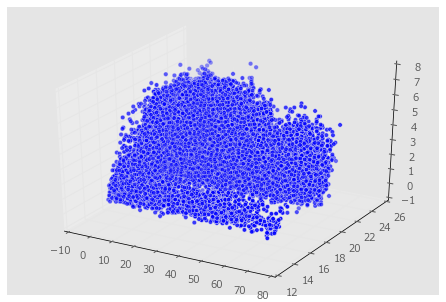

In [73]:
#%pylab inline --no-import-all
%matplotlib --list
%matplotlib qt
x=[pd.read_csv('Stats/'+str(i)+str(j)+'.csv') for j in chamber for i in han]
X=pd.concat(x)
X
#%matplotlib 
#%pylab inline --no-import-all
fig = plt.figure()
ax = Axes3D(fig)
#plt.xscale('log')
ax.scatter3D(X['first_hz'],X['amp'].apply(lambda x :math.log(x)),X['skewness'])
plt.show()

こちらは立体的な感じです。

## 実験C各投与

### 詳細データ
横：first_hz，縦：amp

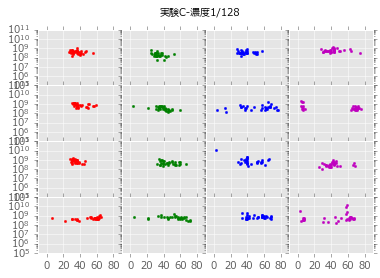

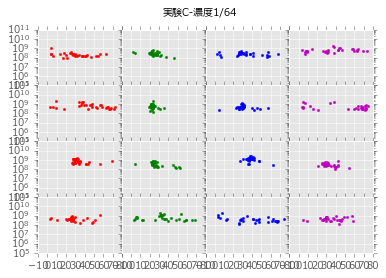

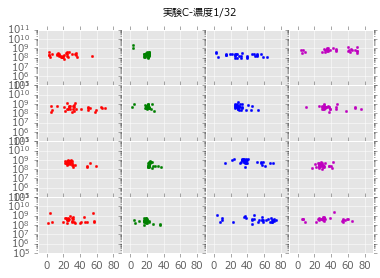

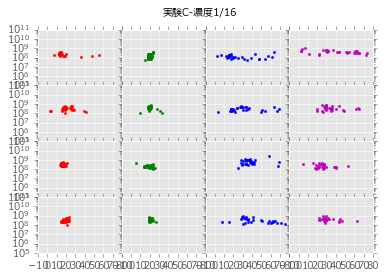

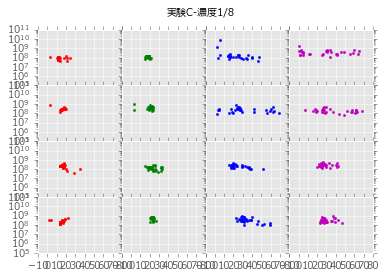

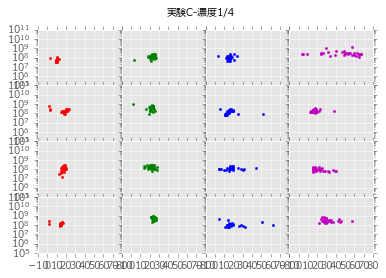

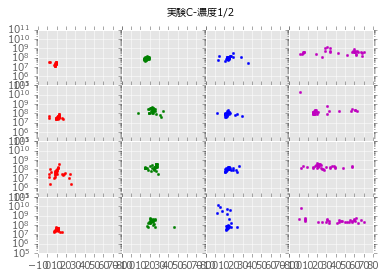

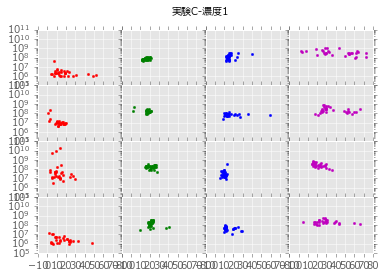

In [79]:
for n in noudo[::-1]:
    #print('C-濃度'+n)
    plt.figure()
    fig,axes=plt.subplots(4,4,sharex=True, sharey=True)
    plt.yscale('log')
    for i in range(4):
        t=pickup(han[i],zikken[2],n)
        for j in range(4):
            axes[i,j].set_ylim([1.0e5,1.0e11])
            axes[i,j].scatter(t[j].first_hz,t[j].amp,marker='.',color=col[j])
            plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('実験C-濃度'+n)
    plt.show()

### 各濃度(班統合)
上から濃度1/128から。

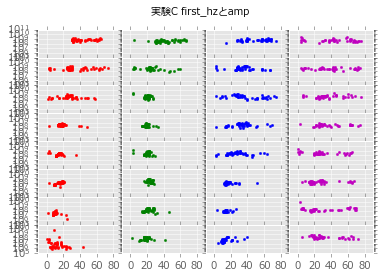

In [110]:
#print('C-濃度'+n)
plt.figure()
fig,axes=plt.subplots(len(noudo),4,sharex=True, sharey=True)
plt.yscale('log')
for k in range(len(noudo)):#濃度
    #axes[k,1].xlabel(noudo[k])
    for i in range(4):#班
        t=pickup(han[i],zikken[2],noudo[::-1][k])
        for j in range(4):#chamber
            #plt.subplot((len(noudo),4,k+4*i))
            #plt.xlabel(noudo[k])
            axes[k,j].set_ylim((1.0e5,1.0e11))
            axes[k,j].scatter(t[j].first_hz,t[j].amp,marker='.',color=col[j])
            plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('実験C first_hzとamp')
plt.show()

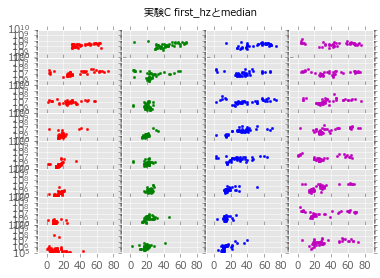

In [113]:
plt.figure()
fig,axes=plt.subplots(len(noudo),4,sharex=True, sharey=True)
plt.yscale('log')
for k in range(len(noudo)):#濃度
    #axes[k,1].xlabel(noudo[k])
    for i in range(4):#班
        t=pickup(han[i],zikken[2],noudo[::-1][k])
        for j in range(4):#chamber
            #plt.subplot((len(noudo),4,k+4*i))
            #plt.xlabel(noudo[k])
            #axes[k,j].set_ylim((1.0e5,1.0e11))
            axes[k,j].scatter(t[j]['first_hz'],t[j]['median'],marker='.',color=col[j])
            plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('実験C first_hzとmedian')
plt.show()

横軸はfirst_hzだが，ばらつきが大きかったり，小さかったりする。濃度によってばらつき，平均値が決まるように見える。

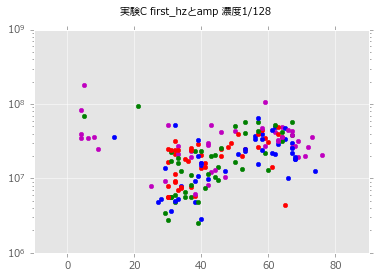

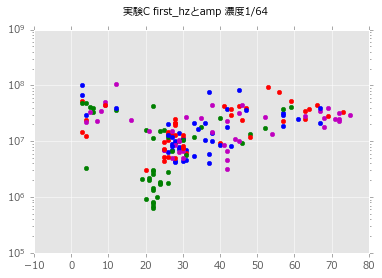

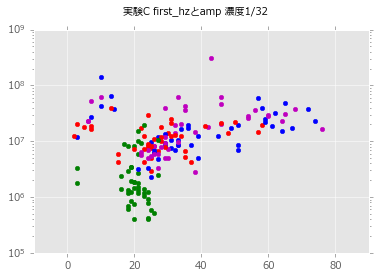

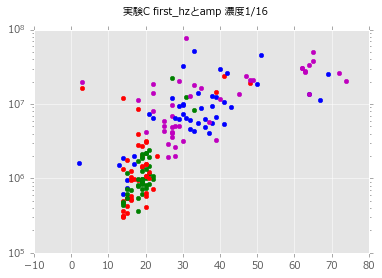

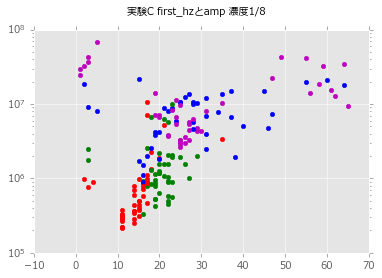

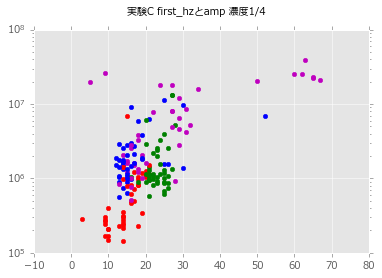

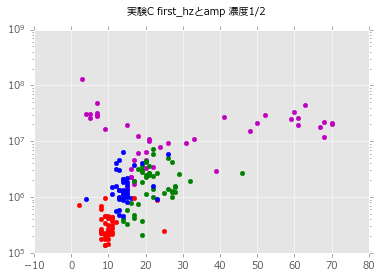

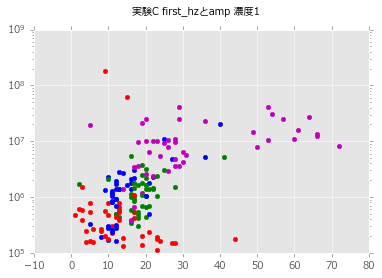

In [118]:

#fig,axes=plt.subplots(len(noudo),4,sharex=True, sharey=True)

for k in range(len(noudo)):#濃度
    plt.figure()
    plt.yscale('log')
    #axes[k,1].xlabel(noudo[k])
    for i in range(4):#班
        t=pickup(han[i],zikken[2],noudo[::-1][k])
        for j in range(4):#chamber
            #plt.subplot((len(noudo),4,k+4*i))
            #plt.xlabel(noudo[k])
            axes[k,j].set_ylim((1.0e5,1.0e11))
            plt.scatter(t[j].first_hz,t[j]['median'],marker='o',color=col[j])
            plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('実験C first_hzとamp 濃度'+noudo[::-1][k])
    plt.show()

### 結論
amp：まず緑(B)が下に落ちて，遅れて赤(A)がさらに下に低下する。青(C)は緑に遅れて同程度に落ちた。

first_hz：まず緑(B)が左に落ちて，赤(A)と青(C)が遅れて緑より落ちた。赤の濃度1がばらついたのは，低amp下でfirst_hzが認識できていない説。